In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


# load data

In [2]:
datafile = r"C:\Users\user\Desktop\coursera class\data\Ames_Housing_Data.tsv"
df = pd.read_csv(datafile, sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
df = df.loc[df['Gr Liv Area'] <= 4000,:]
print(df.shape)
data = df.copy()

(2925, 82)


In [15]:
data_int_col = df.dtypes[df.dtypes == np.int64].index.tolist()
len(data_int_col)

28

In [5]:
data_object_col = df.dtypes[df.dtypes == np.object].index.tolist()
data[data_object_col].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


In [6]:
data[data_object_col].shape

(2925, 43)

In [18]:
data.Street.value_counts()

Pave    2913
Grvl      12
Name: Street, dtype: int64

<BarContainer object of 2 artists>

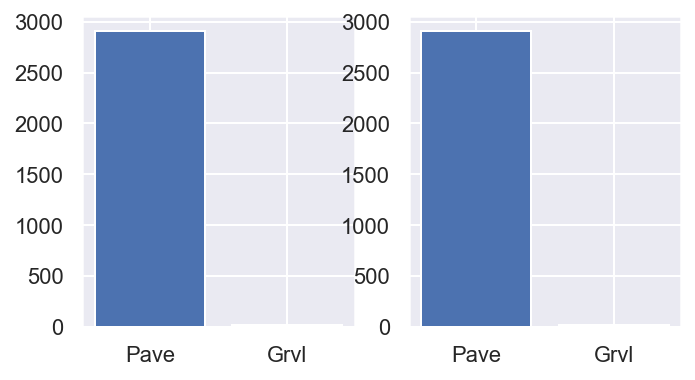

In [29]:
plt.figure(figsize=(20, 20))
plt.subplot(6,7,1)
plt.bar(data.Street.value_counts().index, data.Street.value_counts())
plt.subplot(6,7,2)
plt.bar(data.Street.value_counts().index, data.Street.value_counts())

In [30]:
def hist(df ,col,index):
    plt.subplot(6,7,index+1)
    plt.bar(df[col].value_counts().index,df[col].value_counts())
    

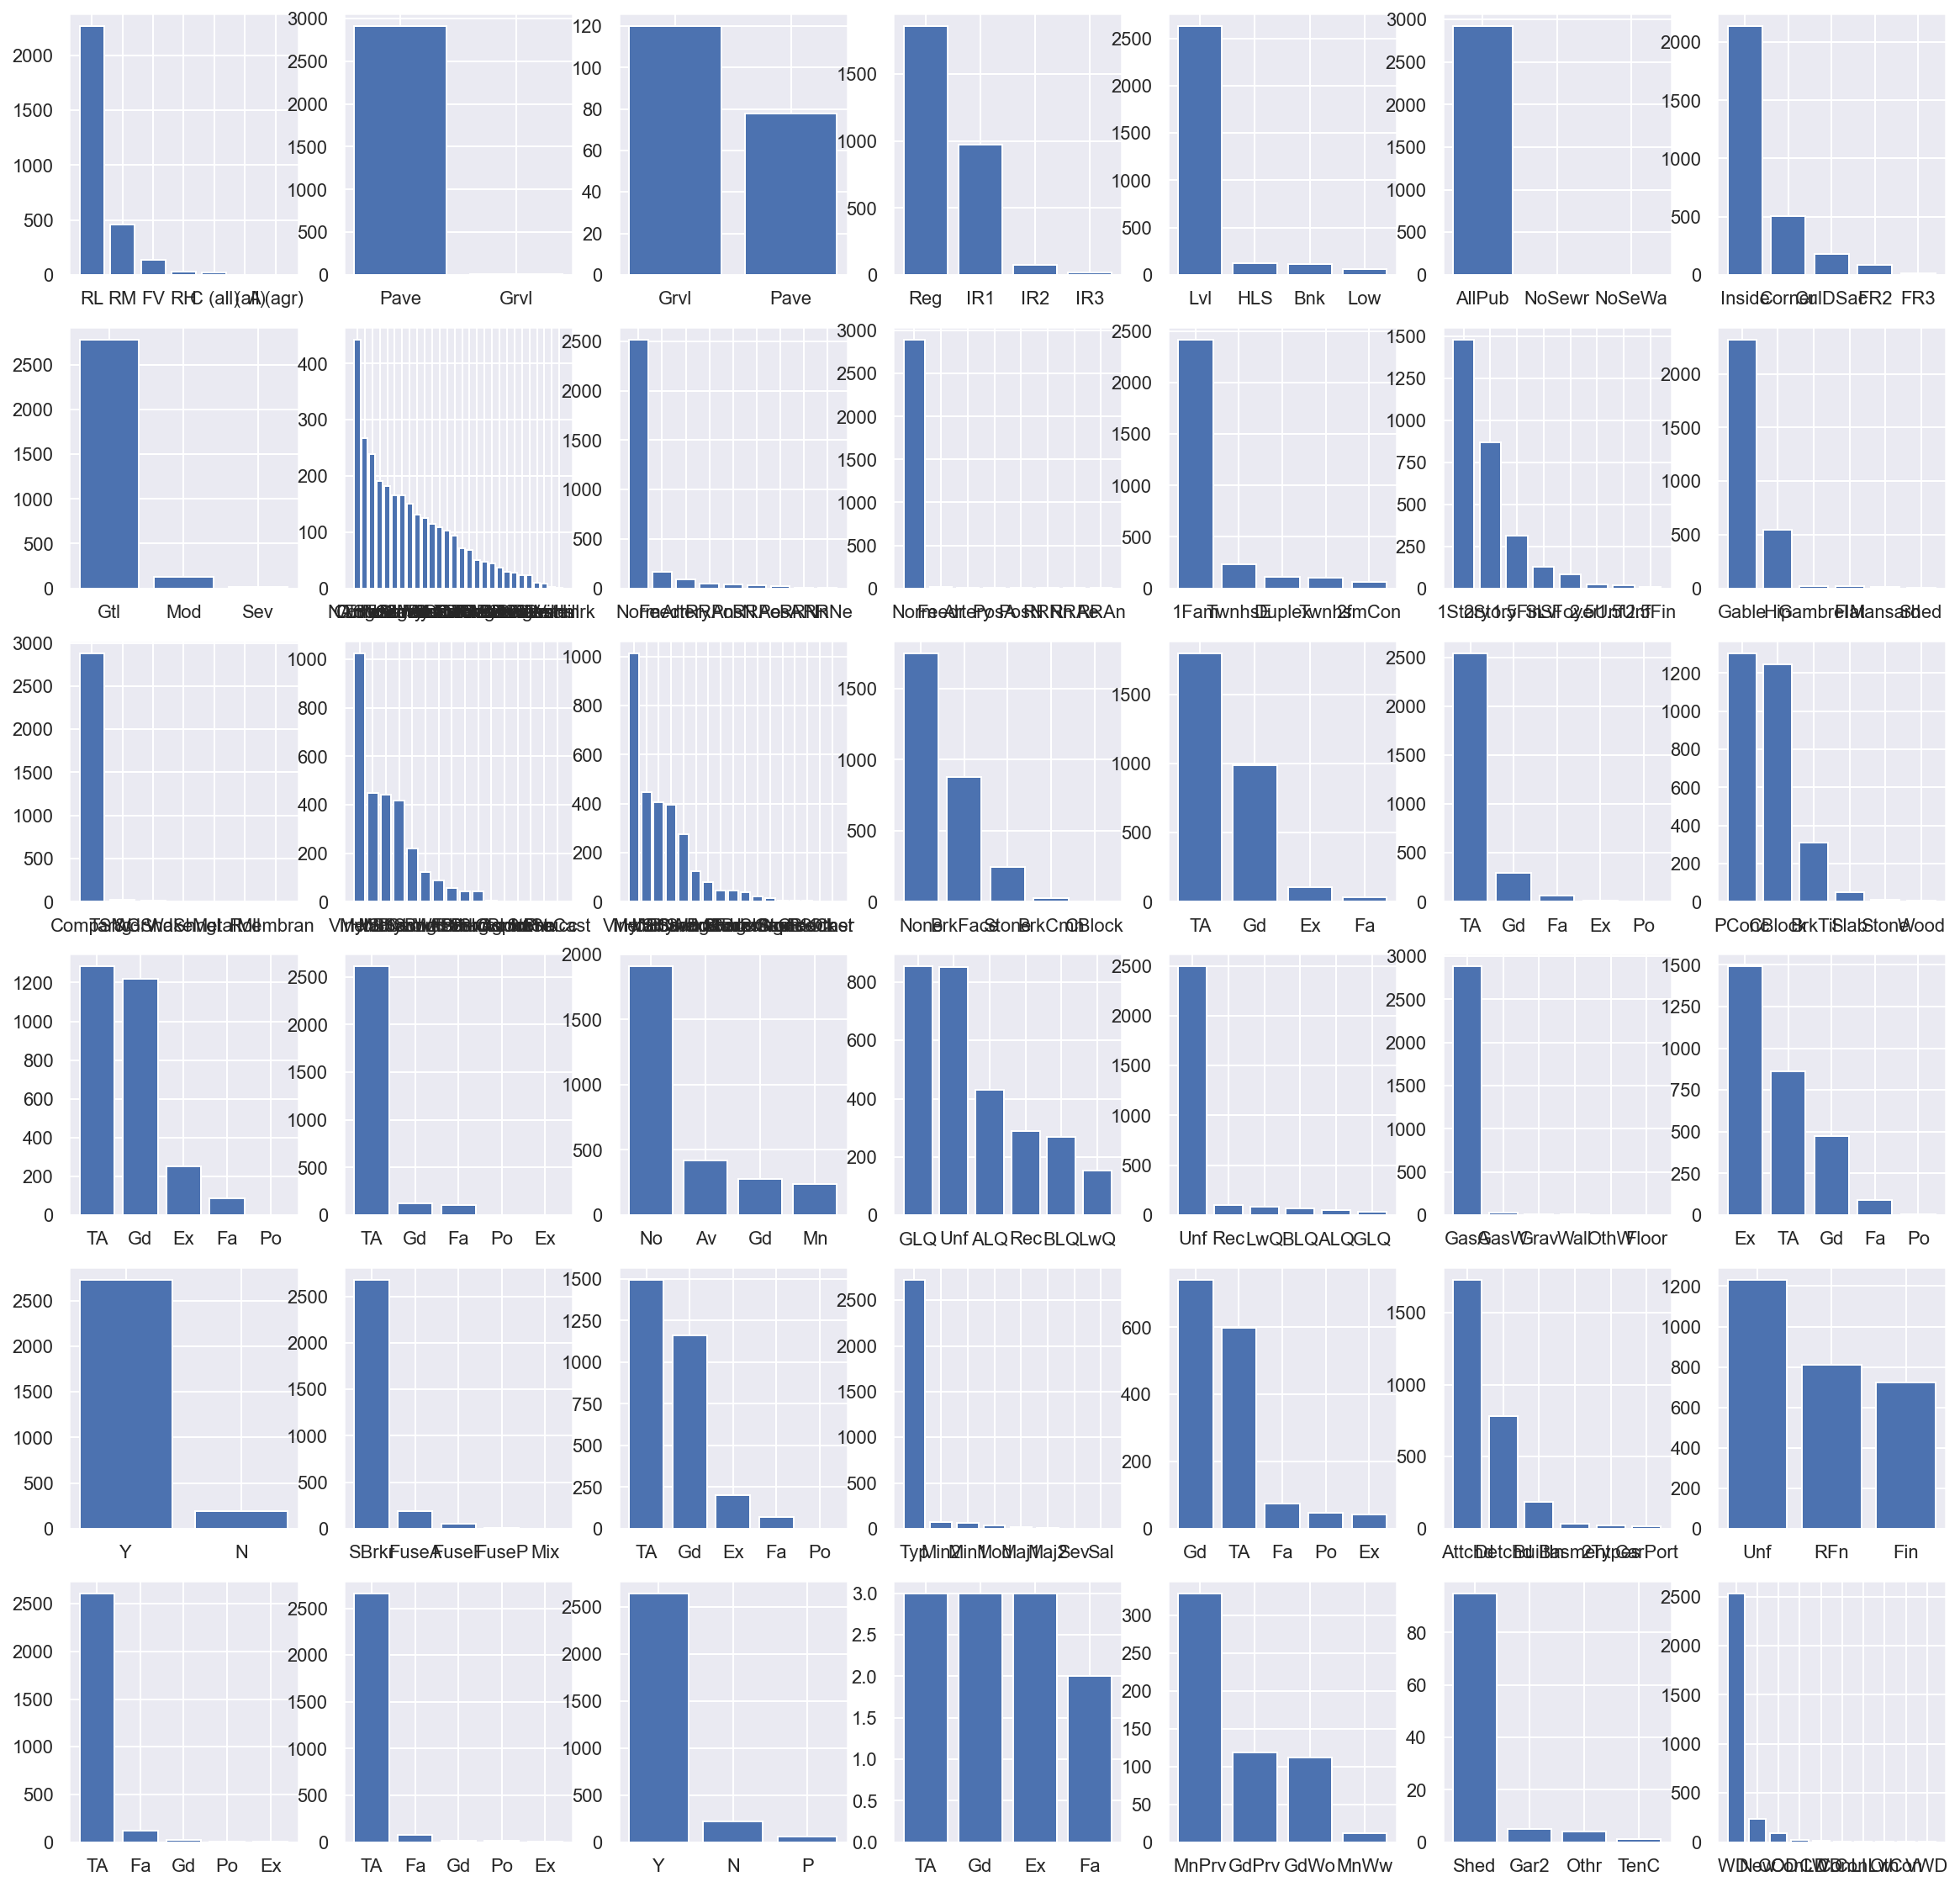

In [32]:
plt.figure(figsize=(20, 20))
for index in range(len(data_object_col)-1):
    hist(data ,data_object_col[index],index)

In [7]:
NAN = [(c,data[c].isna().sum()) for c in data_object_col ]
NAN = pd.DataFrame(NAN,columns=['col_name','NAN'])
NAN[NAN.NAN>0].sort_values('NAN',ascending=False)

,col_name,NAN
38,Pool QC,2914
40,Misc Feature,2820
2,Alley,2727
39,Fence,2354
32,Fireplace Qu,1422
34,Garage Finish,159
35,Garage Qual,159
36,Garage Cond,159
33,Garage Type,157
23,Bsmt Exposure,83


In [8]:
df.Electrical[df[df.Electrical.isna()].index]='SBrkr'

In [9]:
df = pd.get_dummies(df, columns=data_object_col, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,732.0,1463.0,2199.0,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,528477030.0,535453210.0,907180130.0,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,2435.0,6.902382e+01,2.271092e+01,21.0,58.0,68.0,80.0,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7438.0,9428.0,11515.0,2.152450e+05
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,4.102564e-03,6.393067e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Alloca,2925.0,8.205128e-03,9.022520e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Family,2925.0,1.572650e-02,1.244366e-01,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Normal,2925.0,8.246154e-01,3.803608e-01,0.0,1.0,1.0,1.0,1.000000e+00


In [36]:
float_cols = data.columns[data.dtypes == np.float]
data[float_cols[0]]

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

In [41]:
def scc(df ,col,index):
    plt.subplot(3,5,index+1)
    plt.scatter(range(len(df[col])),df[col])
    plt.title(col)

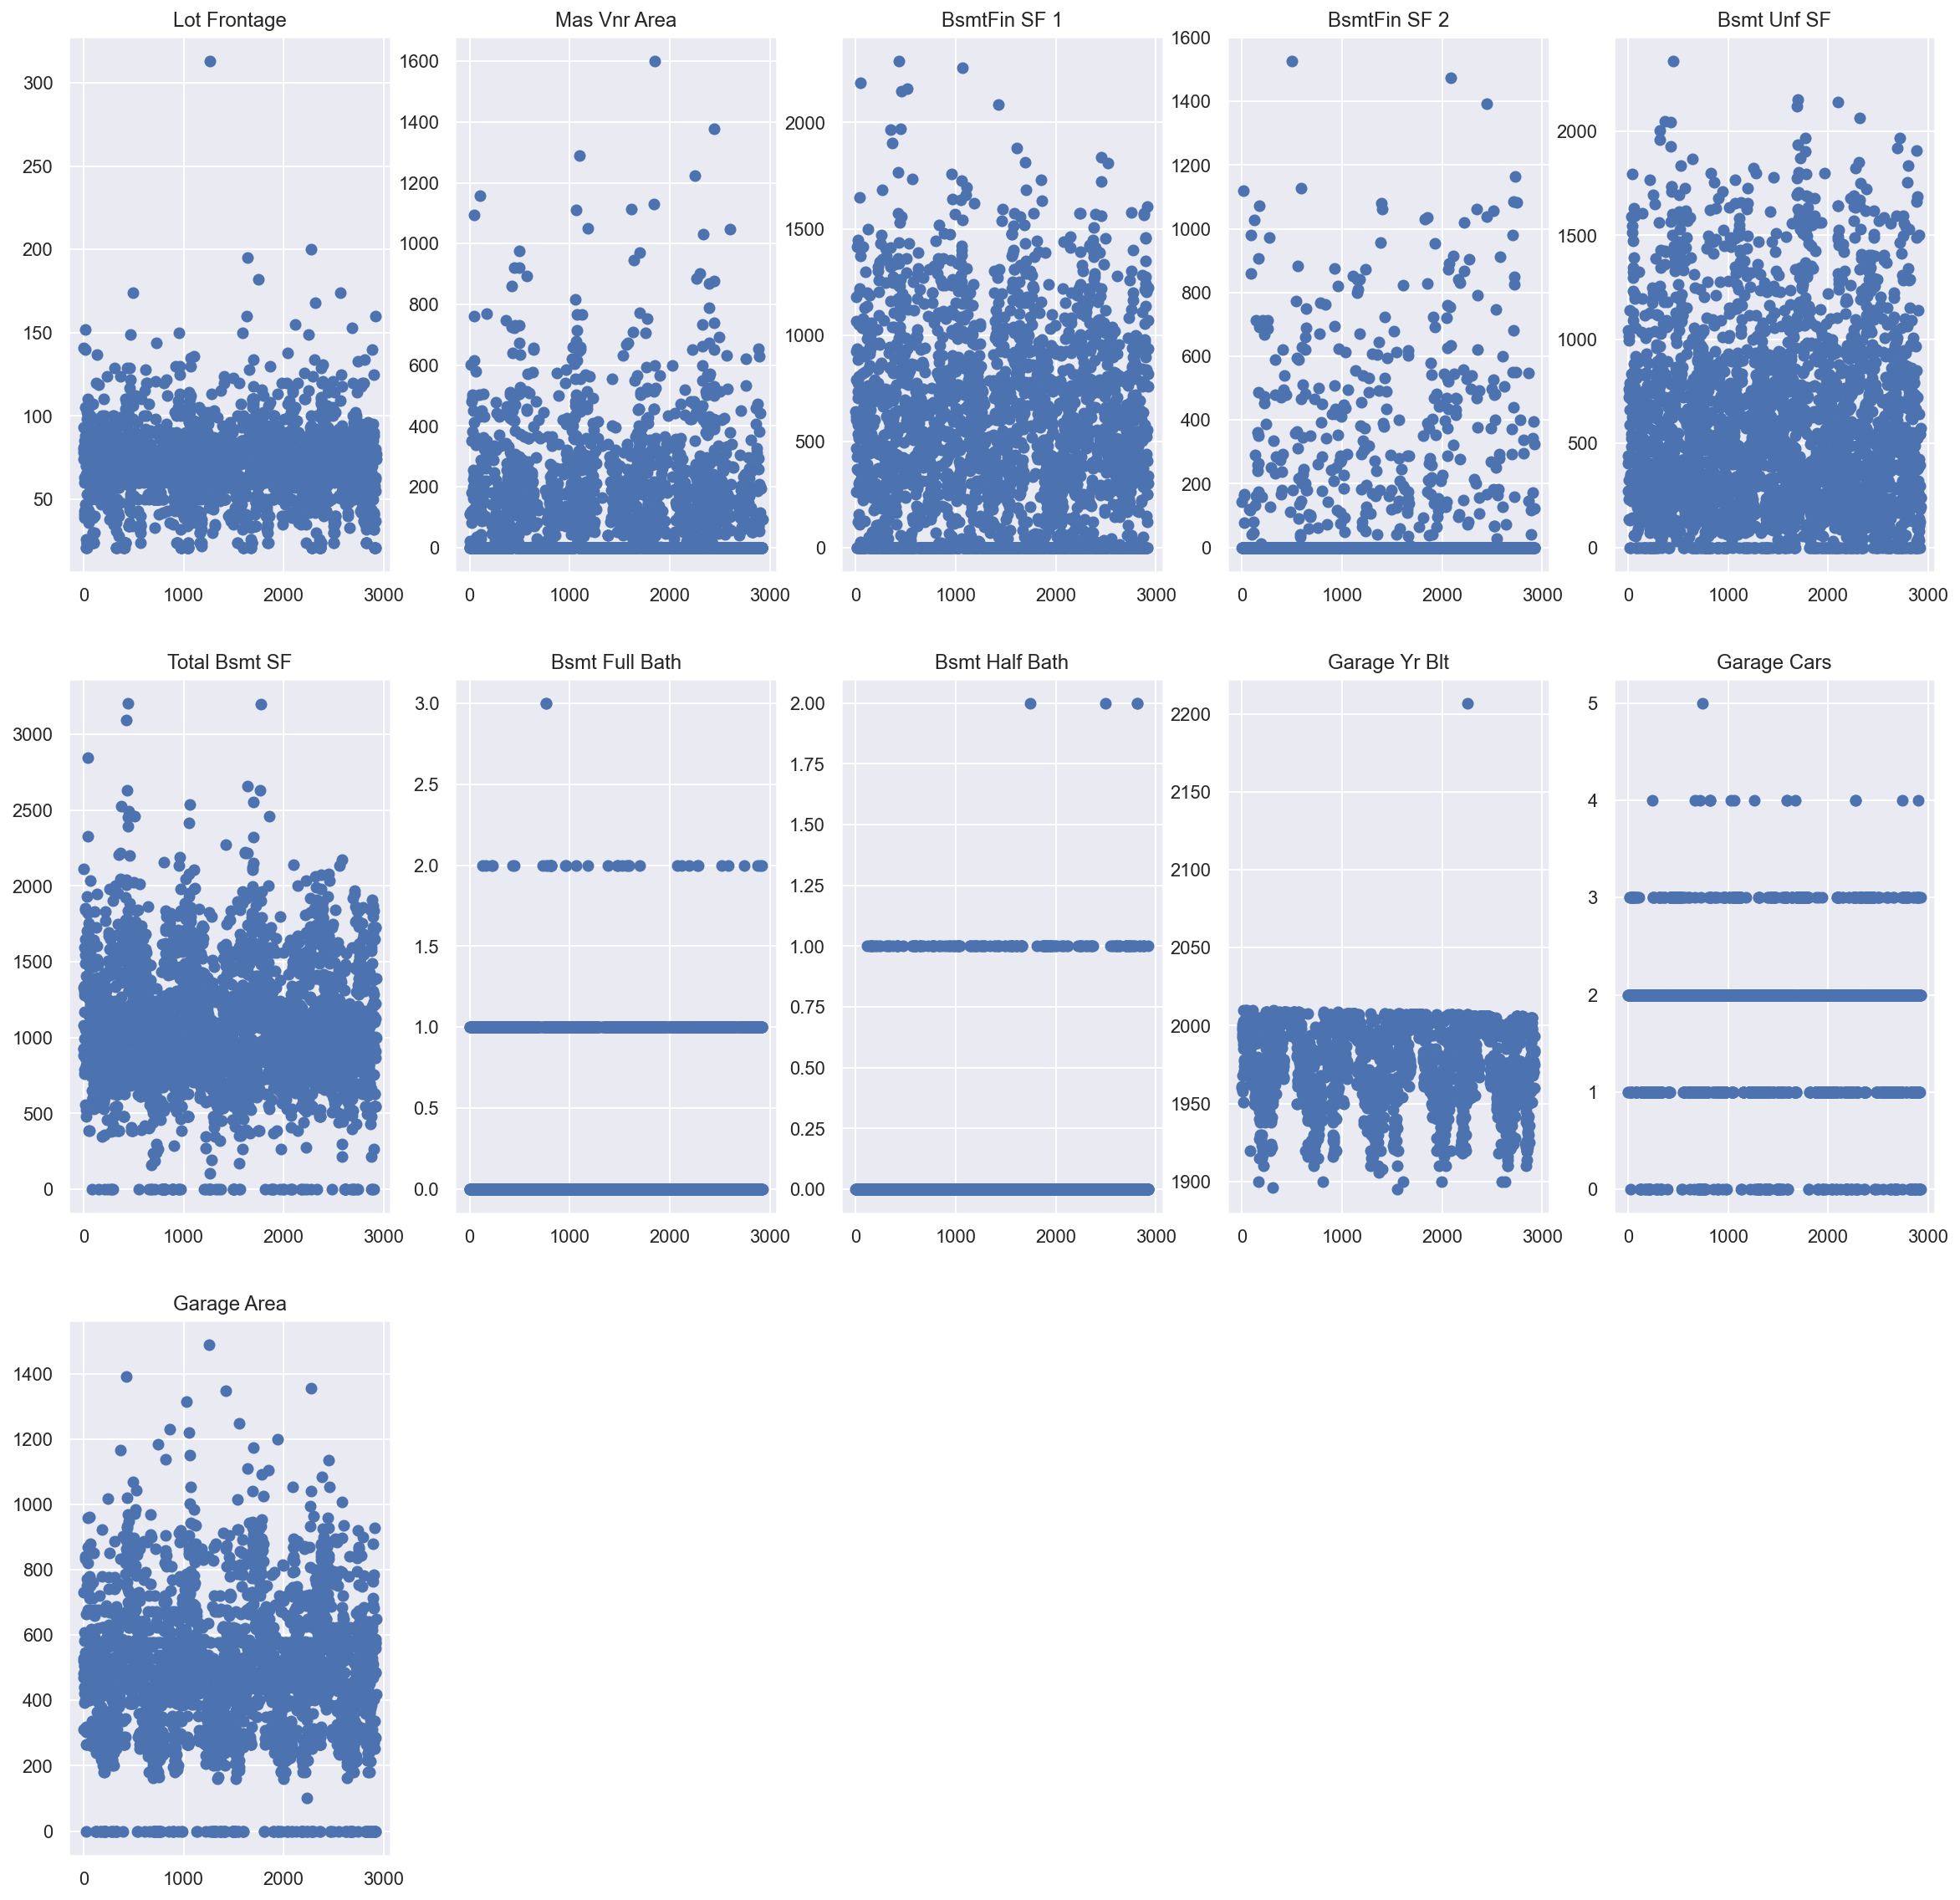

In [42]:
plt.figure(figsize=(20, 20))
for index in range(len(float_cols)):
    scc(data ,float_cols[index],index)

In [45]:
float_cols = data.columns[data.dtypes == np.float]
print(len(float_cols))
skew_limit = 0.75
skew_vals = data[float_cols].skew()
skew_vals

11


Lot Frontage      1.111071
Mas Vnr Area      2.565458
BsmtFin SF 1      0.821985
BsmtFin SF 2      4.135900
Bsmt Unf SF       0.925021
Total Bsmt SF     0.399079
Bsmt Full Bath    0.615553
Bsmt Half Bath    3.965970
Garage Yr Blt    -0.382039
Garage Cars      -0.219734
Garage Area       0.213681
dtype: float64

In [46]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
BsmtFin SF 2,4.135900
Bsmt Half Bath,3.965970
Mas Vnr Area,2.565458
Lot Frontage,1.111071
Bsmt Unf SF,0.925021
BsmtFin SF 1,0.821985


In [47]:
for col in skew_cols.index:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

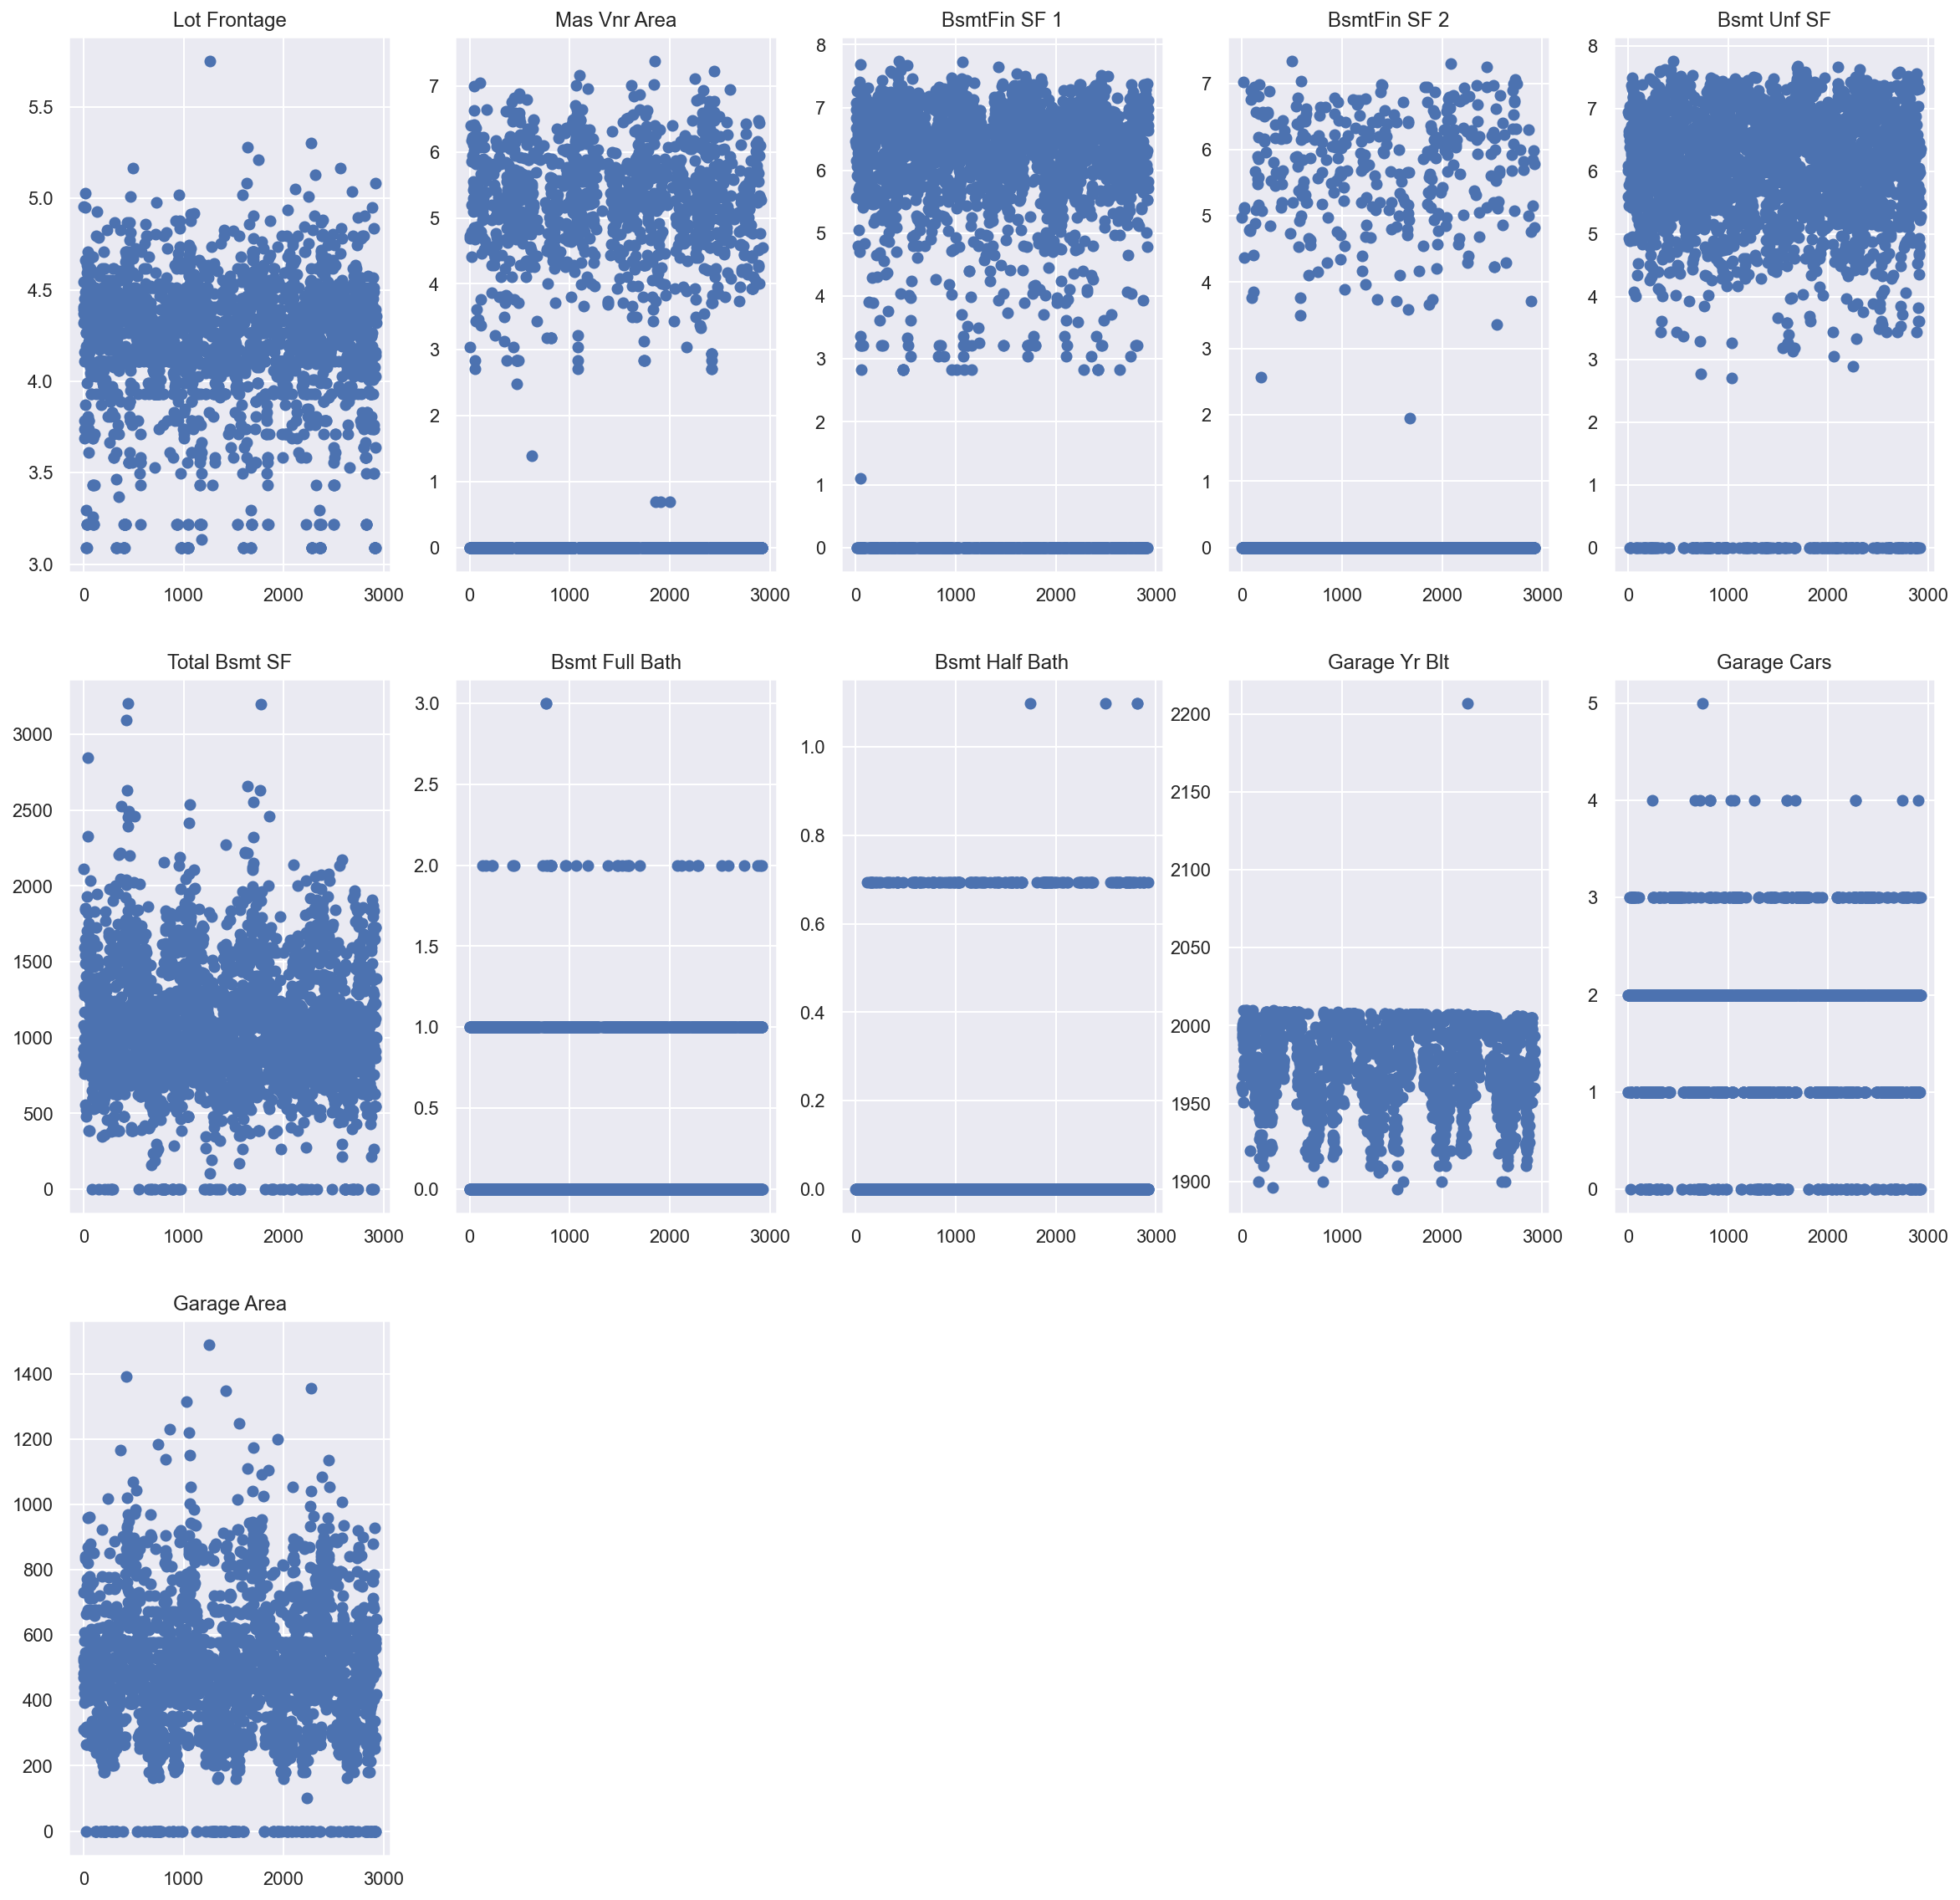

In [48]:
plt.figure(figsize=(20, 20))
for index in range(len(float_cols)):
    scc(df ,float_cols[index],index)

In [12]:
df.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,4.955827,31770,6,5,1960,1960,4.727388,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,4.394449,11622,5,6,1961,1961,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,4.406719,14267,6,6,1958,1958,4.691348,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,4.543295,11160,7,5,1968,1968,0.000000,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,4.317488,13830,5,5,1997,1998,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [13]:
df

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,4.955827,31770,6,5,1960,1960,4.727388,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,4.394449,11622,5,6,1961,1961,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,4.406719,14267,6,6,1958,1958,4.691348,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,4.543295,11160,7,5,1968,1968,0.000000,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,4.317488,13830,5,5,1997,1998,0.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,3.637586,7937,6,6,1984,1984,0.000000,...,0,0,0,0,1,0,0,0,1,0
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.000000,...,0,0,0,0,1,0,0,0,1,0
2927,2928,923400125,85,4.143135,10441,5,5,1992,1992,0.000000,...,0,0,0,0,1,0,0,0,1,0
2928,2929,924100070,20,4.356709,10010,5,5,1974,1975,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [41]:
a = df.isnull().sum()
na_col = a[a>0].sort_values().index
na_col

Index([], dtype='object')

In [27]:
df[na_col] = df[na_col].fillna(0)


In [43]:
df[float_cols]

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,4.955827,4.727388,6.461468,0.000000,6.091310,1080.0,1.0,0.000000,1960.0,2.0,528.0
1,4.394449,0.000000,6.150603,4.976734,5.602119,882.0,0.0,0.000000,1961.0,1.0,730.0
2,4.406719,4.691348,6.828712,0.000000,6.008813,1329.0,0.0,0.000000,1958.0,1.0,312.0
3,4.543295,0.000000,6.971669,0.000000,6.952729,2110.0,1.0,0.000000,1968.0,2.0,522.0
4,4.317488,0.000000,6.674561,0.000000,4.927254,928.0,0.0,0.000000,1997.0,2.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...
2925,3.637586,0.000000,6.709304,0.000000,5.220356,1003.0,1.0,0.000000,1984.0,2.0,588.0
2926,0.000000,0.000000,5.710427,5.783825,5.480639,864.0,1.0,0.000000,1983.0,2.0,484.0
2927,4.143135,0.000000,5.823046,0.000000,6.356108,912.0,0.0,0.693147,0.0,0.0,0.0
2928,4.356709,0.000000,6.977281,4.820282,5.278115,1389.0,1.0,0.000000,1975.0,2.0,418.0


In [46]:
y = df.SalePrice

In [71]:

X=df

In [72]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2
X2.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,OQ2,GLA2
0,1,526301100,20,4.955827,31770,6,5,1960,1960,4.727388,...,0,0,1,0,0,0,1,0,36,2742336
1,2,526350040,20,4.394449,11622,5,6,1961,1961,0.000000,...,0,0,1,0,0,0,1,0,25,802816
2,3,526351010,20,4.406719,14267,6,6,1958,1958,4.691348,...,0,0,1,0,0,0,1,0,36,1766241
3,4,526353030,20,4.543295,11160,7,5,1968,1968,0.000000,...,0,0,1,0,0,0,1,0,49,4452100
4,5,527105010,60,4.317488,13830,5,5,1997,1998,0.000000,...,0,0,1,0,0,0,1,0,25,2653641


In [73]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']
X3.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,OQ2,GLA2,OQ_x_YB,OQ_/_LA
0,1,526301100,20,4.955827,31770,6,5,1960,1960,4.727388,...,1,0,0,0,1,0,36,2742336,11760,0.000189
1,2,526350040,20,4.394449,11622,5,6,1961,1961,0.000000,...,1,0,0,0,1,0,25,802816,9805,0.000430
2,3,526351010,20,4.406719,14267,6,6,1958,1958,4.691348,...,1,0,0,0,1,0,36,1766241,11748,0.000421
3,4,526353030,20,4.543295,11160,7,5,1968,1968,0.000000,...,1,0,0,0,1,0,49,4452100,13776,0.000627
4,5,527105010,60,4.317488,13830,5,5,1997,1998,0.000000,...,1,0,0,0,1,0,25,2653641,9985,0.000362


In [92]:
X3['Garage Cars'].value_counts()

2.0    1602
1.0     778
3.0     370
0.0     158
4.0      16
5.0       1
Name: Garage Cars, dtype: int64

In [114]:
sun = X3['Year Built'].value_counts()
print(len(X3[X3['Year Built']<=1990]))
len(X3[X3['Year Built']>1990])

1832


1093

Q1:
MS SubClass greater than 50 and MS SubClassr less than 50 have the same saleprice
H0 : mu(MS SubClass<=50) = mu(MS SubClass>50 )
H1 : mu(MS SubClass<=50) != mu(MS SubClass>50 )

Q2:
In different year the saleprice is no significant difference
H0 : mu(Year Built<=1990) = mu(Year Built >1990)
H1 : mu(Year Built<=1990) != mu(Year Built >1990)

Q2:
There is no difference in price between 2 cars in the garage and less than 2 cars in the garage
H0 : mu(garage cars =2) = mu(garage cars <2)
H1 : mu(garage cars =2) != mu(garage cars <2)

In [117]:
less_price = X3[X3['Year Built']<=1990].SalePrice
biggrt_price = X3[X3['Year Built']>1990].SalePrice

In [123]:
mu_less_price = X3[X3['Year Built']<=1990].SalePrice.mean()
mu_biggrt_price = X3[X3['Year Built']>1990].SalePrice.mean()

std_less_price =X3[X3['Year Built']<=1990].SalePrice.std()
std_biggrt_price = X3[X3['Year Built']>1990].SalePrice.std()

Z = (mu_less_price-mu_biggrt_price)/(((std_less_price**2/len(less_price))+(std_biggrt_price**2/len(biggrt_price)))**(1/2))
Z

-35.06159930258983

abs(Z) bigger than 1.96 , so reject Q2 H0 ,difference Year Built could affect saleprice

I think it is not a complete analysis, I try my best to deal with the data
In data processing, it may be possible to use correlation to find variables related to the target